<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

input_file = 'files/verbal_autopsies_clean.csv'

df = pd.read_csv(input_file, header = 0)  # creamos el dataframe general

print(f"Número de instancias: {df.size}")

print("\nAtributos:")
print("------------")
print(df.dtypes)
print("\nDescripción:")
print("------------")
print(df.describe())


Número de instancias: 107802

Atributos:
------------
newid              int64
module            object
site              object
gs_text34         object
sex              float64
age_years        float64
age_months       float64
age_days         float64
open_response     object
dtype: object

Descripción:
------------
              newid           sex    age_years  age_months     age_days
count  11978.000000  11957.000000  8790.000000  731.000000  2438.000000
mean    2926.126983      1.456302    54.935040    5.218878     2.312551
std     2274.763294      0.502787   112.641439    3.184074     5.178228
min        1.000000      1.000000     0.000000    1.000000     0.000000
25%     1058.000000      1.000000    24.000000    2.000000     0.000000
50%     2131.500000      1.000000    43.000000    5.000000     0.000000
75%     4766.750000      2.000000    61.000000    8.000000     2.000000
max     7846.000000      9.000000   999.000000   12.000000    99.000000


In [2]:
df.head(20)  # echamos un vistazo al dataframe para ver la estructura

,newid,module,site,gs_text34,sex,age_years,age_months,age_days,open_response
0,1,Adult,Mexico,Cirrhosis,1.0,51.0,NaN,NaN,no comments.[PERSON] only told us what happene...
1,2,Adult,AP,Epilepsy,1.0,24.0,NaN,NaN,[PATIENT] was suffering for the last two years...
2,3,Adult,AP,Pneumonia,2.0,62.0,NaN,NaN,she has stopped consuming tablets for b.p and ...
3,4,Adult,Mexico,COPD,2.0,80.0,NaN,NaN,my mother's condition was already very poor du...
4,5,Adult,UP,Acute Myocardial Infarction,1.0,76.0,NaN,NaN,the deceased suffered a heart attack 2 days ag...
5,6,Adult,UP,Fires,2.0,16.0,NaN,NaN,the deceased had been burnt and had lost menta...
6,7,Adult,Dar,Renal Failure,1.0,65.0,NaN,NaN,the client thanked for the service_x000D__x000...
7,8,Adult,Dar,AIDS,2.0,999.0,NaN,NaN,the participant explaned that the deceased was...
8,9,Adult,Bohol,Lung Cancer,1.0,68.0,NaN,NaN,"it was month of august [YEAR], when the deceas..."
9,10,Adult,UP,Maternal,2.0,32.0,NaN,NaN,the deceased had been 3 months pregnant. 2 day...


1.0    6508
2.0    5448
9.0       1
Name: sex, dtype: int64


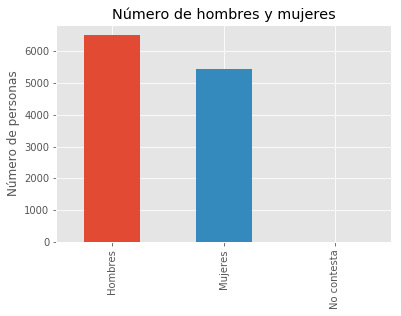

In [3]:
print(df['sex'].value_counts())

axes = df['sex'].value_counts().plot('bar')

plt.title("Número de hombres y mujeres")
plt.ylabel("Número de personas")
axes.set_xticklabels(('Hombres', 'Mujeres', "No contesta"))
plt.show()

Dar       3187
AP        2377
UP        2170
Mexico    1787
Bohol     1734
Pemba      723
Name: site, dtype: int64


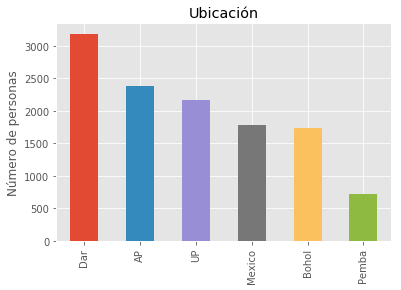

In [4]:
print(df['site'].value_counts())

axes = df['site'].value_counts().plot('bar')

plt.title("Ubicación")
plt.ylabel("Número de personas")
#axes.set_xticklabels(('Hombres', 'Mujeres', "No contesta"))
plt.show()

Adult      7580
Neonate    2438
Child      1960
Name: module, dtype: int64


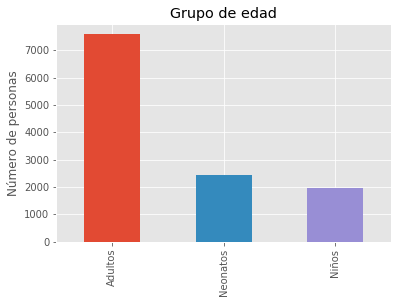

In [5]:
print(df['module'].value_counts())

axes = df['module'].value_counts().plot('bar')

plt.title("Grupo de edad")
plt.ylabel("Número de personas")
axes.set_xticklabels(('Adultos', 'Neonatos', "Niños"))
plt.show()

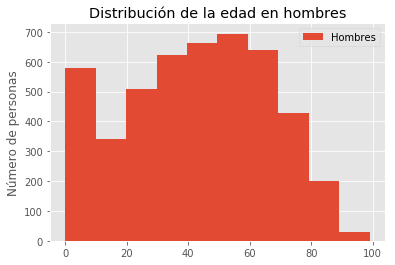

In [6]:
df_age = df.loc[df['age_years'] != 999]  # quitamos los valores 999
df_age = df_age.loc[df['sex'] != 9.]
#prindf_age["sex"].value_counts())
df_age = df_age[['sex','age_years']]
#print(df_age)
#axes = df_age.age_years.hist()

df_age_men = df_age.loc[df_age['sex'] == 1.]
df_age_women = df_age.loc[df_age['sex'] == 2.]

df_age_men.age_years.hist()

plt.title("Distribución de la edad en hombres")
plt.ylabel("Número de personas")
plt.legend(labels=["Hombres"])
plt.show()


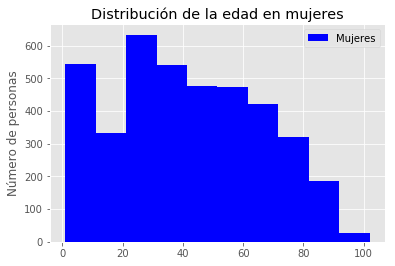

In [7]:
df_age_women = df_age.loc[df_age['sex'] == 2.]

df_age_women.age_years.hist(color="blue")

plt.title("Distribución de la edad en mujeres")
plt.ylabel("Número de personas")
plt.legend(labels=["Mujeres"])
plt.show()

In [8]:
df['gs_text34'].nunique()

48

Causas de muerte en hombres:
--------------------------------
Pneumonia                               576
Stillbirth                              517
Other Non-communicable Diseases         340
Stroke                                  321
Preterm Delivery                        317
AIDS                                    291
Renal Failure                           259
Birth asphyxia                          255
Diarrhea/Dysentery                      250
Other Cardiovascular Diseases           232
Cirrhosis                               226
Acute Myocardial Infarction             216
Diabetes                                210
Road Traffic                            207
Other Infectious Diseases               189
TB                                      171
Falls                                   164
Drowning                                136
Homicide                                133
Congenital malformation                 121
Malaria                                 116
COPD          

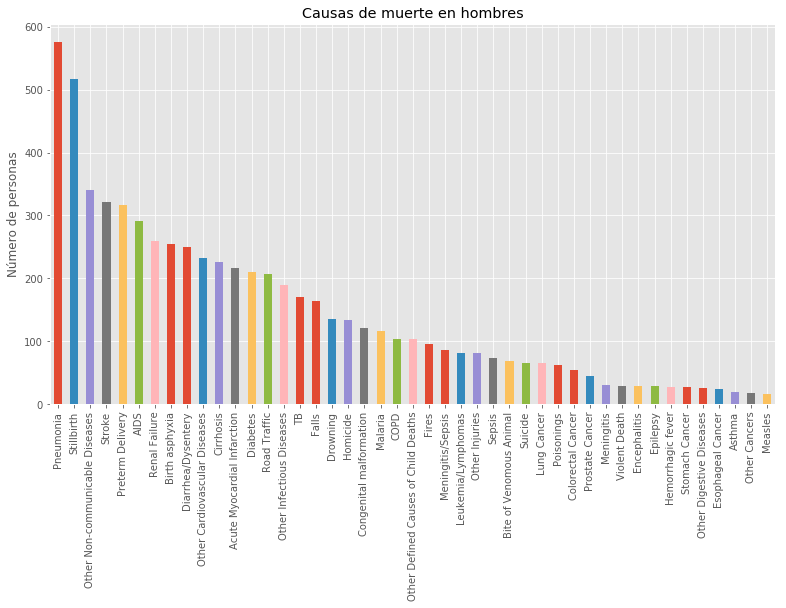

In [9]:
plt.figure(figsize=(13,7))

df_dis_men = df.loc[df['sex'] == 1.]
axes = df_dis_men['gs_text34'].value_counts().plot('bar')
print("Causas de muerte en hombres:")
print("--------------------------------")
print(df_dis_men['gs_text34'].value_counts())

plt.title("Causas de muerte en hombres")
plt.ylabel("Número de personas")
plt.show()

Causas de muerte en mujeres:
--------------------------------
Pneumonia                               512
Maternal                                461
Stillbirth                              439
Stroke                                  284
Preterm Delivery                        272
Other Non-communicable Diseases         254
Other Cardiovascular Diseases           245
AIDS                                    219
Diarrhea/Dysentery                      206
Breast Cancer                           185
Diabetes                                183
Birth asphyxia                          170
Acute Myocardial Infarction             162
Cervical Cancer                         149
Renal Failure                           140
Other Infectious Diseases               135
Congenital malformation                 105
TB                                      102
Malaria                                  96
Fires                                    90
Road Traffic                             78
Other Defined 

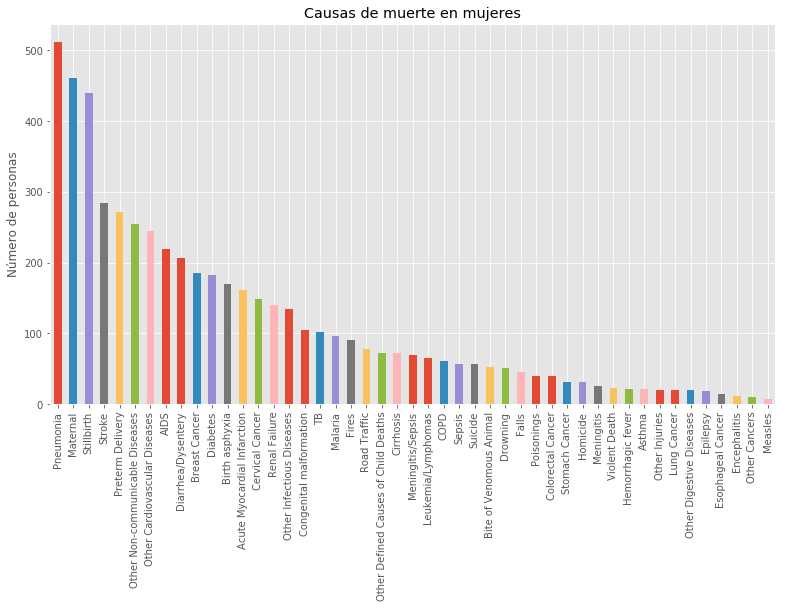

In [10]:

plt.figure(figsize=(13,7))

df_dis_women = df.loc[df['sex'] == 2.]
axes = df_dis_women['gs_text34'].value_counts().plot('bar')
print("Causas de muerte en mujeres:")
print("--------------------------------")
print(df_dis_women['gs_text34'].value_counts())

plt.title("Causas de muerte en mujeres")
plt.ylabel("Número de personas")
plt.show()

In [11]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models import Word2Vec

import string
import nltk
import itertools


try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


def clean(t, use_stemmer=True):
    #sentences = sent_tokenize(t)
    # Genera un array de palabras (word_tokenize)
    tokens = word_tokenize(t)
    # Convierte las palabras en minúsculas(to lower case)
    tokens = [w.lower() for w in tokens]
    # Elimina signos de puntuación
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    

    # Elimina símbolos no alfabéticos
    words = [word for word in stripped if word.isalpha()]
    
    # Filtra preposiciones (stop-words)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Guarda la raíz de las palabras (stemming of words)
    if use_stemmer:
        porter = PorterStemmer()
        words = [porter.stem(word) for word in words]
    
    # Genera una nueva lista “limpia” de oraciones
    return words

sentences = df["open_response"]

clean_sentences = [clean(str(i)) for i in sentences]

#print(clean_sentences[0])

model = Word2Vec(clean_sentences, min_count=1)  # TODO entender esto mejor

#print (list(model.wv.vocab))

flattened_sentences = list(itertools.chain.from_iterable(clean_sentences))

word_counter = Counter(flattened_sentences)

for item in sorted( ((v,k) for k,v in word_counter.items()), reverse=True):
    print(f"{item[0]} : {item[1]}")

X = model[model.wv.vocab]  # TODO entender bien esto para usarlo con nuestro kmeans

8178 : hospit
6092 : doctor
5348 : day
5110 : deceas
4500 : babi
4393 : die
3840 : said
3207 : death
3082 : year
2790 : also
2656 : blood
2624 : month
2400 : suffer
2284 : breath
2280 : client
2161 : fever
2154 : pain
2128 : took
2116 : went
2100 : due
2099 : time
2046 : nt
2025 : child
2005 : told
1978 : place
1855 : brought
1822 : admit
1680 : got
1653 : problem
1649 : servic
1631 : respond
1614 : patient
1523 : start
1480 : medicin
1472 : becam
1450 : us
1429 : given
1417 : one
1417 : bodi
1393 : sinc
1367 : mother
1357 : last
1308 : take
1295 : even
1267 : difficulti
1252 : alreadi
1205 : oper
1186 : use
1161 : nan
1155 : home
1142 : heart
1123 : thank
1121 : taken
1110 : treatment
1073 : vomit
1069 : gave
1020 : would
1016 : go
1006 : done
994 : came
950 : stomach
937 : interview
920 : caus
917 : oxygen
909 : cough
901 : get
896 : condit
891 : nurs
890 : still
884 : back
881 : weak
875 : week
863 : health
852 : medic
839 : first
826 : well
822 : deliveri
812 : later
811 : ill
800 

3 : grandchildren
3 : glump
3 : girlfriend
3 : geminoma
3 : gastro
3 : gaspain
3 : gasolin
3 : g
3 : futur
3 : fuse
3 : furnitur
3 : frontal
3 : frequenc
3 : freaquent
3 : fourteen
3 : fought
3 : formerli
3 : forgiv
3 : forgetful
3 : forev
3 : fold
3 : fluctuat
3 : flex
3 : flatu
3 : flash
3 : fineth
3 : fineeveryth
3 : feebl
3 : fatherinlaw
3 : extirp
3 : exposur
3 : experiec
3 : exist
3 : exhal
3 : execut
3 : excercis
3 : excellentth
3 : excel
3 : excav
3 : exampl
3 : eversinc
3 : eve
3 : especiali
3 : episiotomi
3 : epelipt
3 : ensur
3 : enrout
3 : engin
3 : energet
3 : employe
3 : emphas
3 : elementari
3 : eject
3 : effici
3 : edibl
3 : eczema
3 : ectop
3 : eateri
3 : dyspepsia
3 : drench
3 : draw
3 : drainag
3 : downpay
3 : doubtsth
3 : doorstep
3 : dnr
3 : divorc
3 : dive
3 : dissatisfi
3 : disloc
3 : dislik
3 : disgust
3 : disconcert
3 : disco
3 : din
3 : dig
3 : diffus
3 : diffir
3 : diclofenac
3 : diastol
3 : dialyz
3 : diabeti
3 : diabetesth
3 : desper
3 : desir
3 : desert
3 

1 : msaili
1 : mro
1 : mr
1 : mpther
1 : movingth
1 : movi
1 : mouthuntil
1 : mouthpip
1 : mous
1 : mounth
1 : motuari
1 : mottl
1 : motiv
1 : motionless
1 : mothn
1 : motheri
1 : motherh
1 : mosthi
1 : morturi
1 : mortem
1 : mortal
1 : moriamin
1 : moretwo
1 : moresh
1 : moresfh
1 : moreinterview
1 : moredifficult
1 : moral
1 : mop
1 : monthsmooth
1 : monthsit
1 : monthsher
1 : monthsh
1 : monthlong
1 : monther
1 : monosodium
1 : monggo
1 : momento
1 : moistwet
1 : moist
1 : mode
1 : mockingli
1 : mobil
1 : mob
1 : mnth
1 : mm
1 : mixup
1 : mitu
1 : mital
1 : mistaketh
1 : mistakenli
1 : mispleas
1 : misplacrd
1 : mispalc
1 : mispac
1 : miser
1 : mischiev
1 : misbehavior
1 : mirchi
1 : minutesno
1 : minuteseveryth
1 : minutesani
1 : mint
1 : mini
1 : mingl
1 : mine
1 : milo
1 : milliari
1 : miliari
1 : mile
1 : mildli
1 : migrain
1 : migh
1 : midwiferi
1 : midregion
1 : midfront
1 : midaugust
1 : micronodul
1 : microbi
1 : micro
1 : michael
1 : mice
1 : mhg
1 : mhalox
1 : metropolol
1

/home/ander/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [12]:
print(len(X[0]))

100


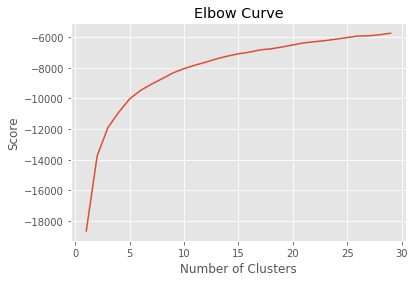

In [13]:
from sklearn import cluster

Nc = range(1, 30)
kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

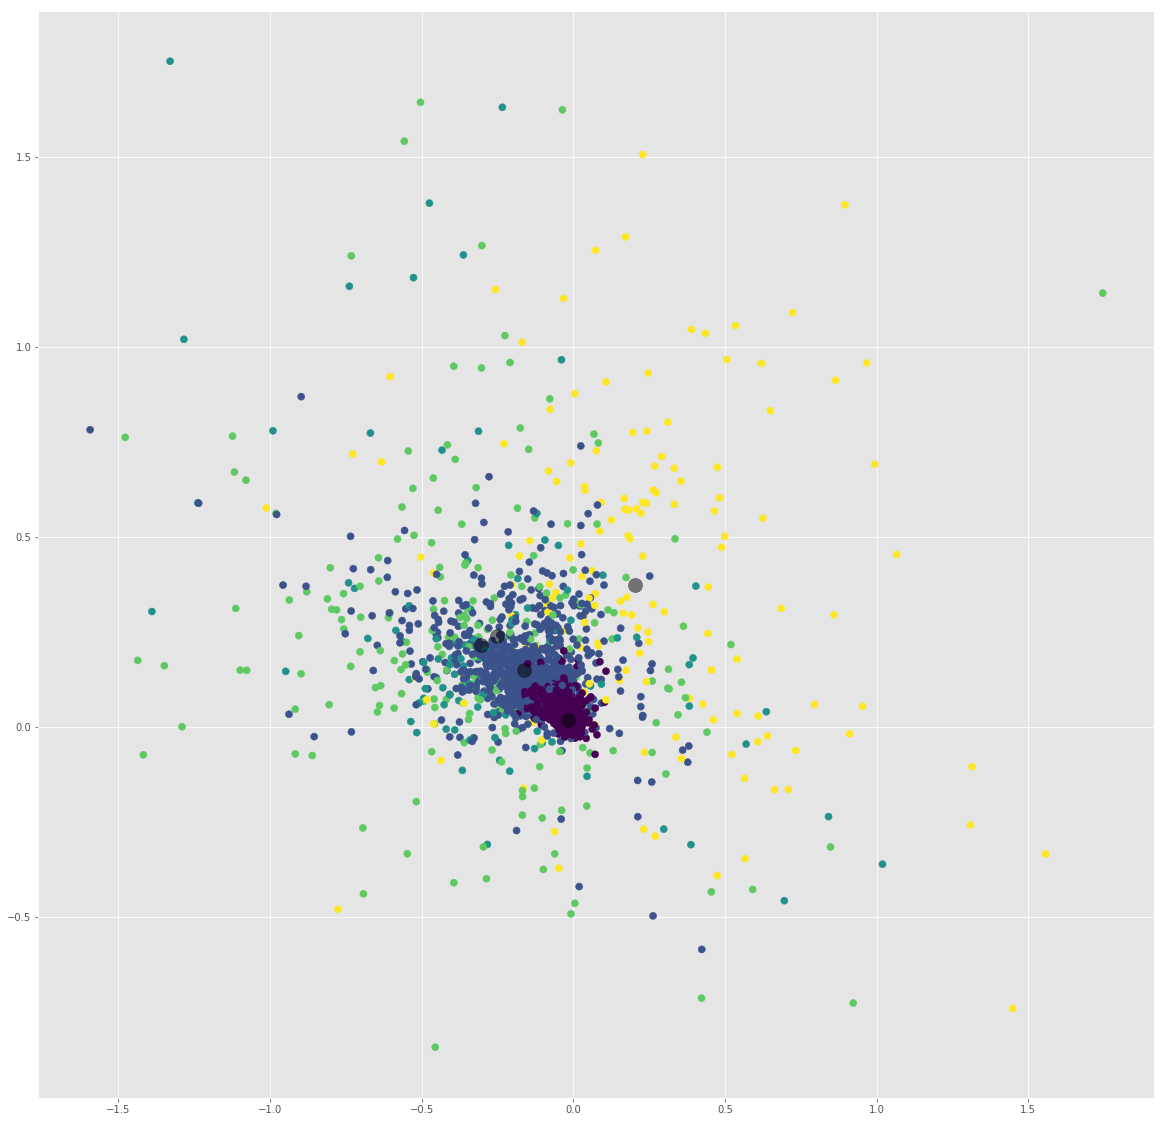

In [14]:
# segun el grafico anterior el codo esta mas o menos en 10 clusters

NUM_CLUSTERS = 5

from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(20,20))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("\nScore (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("\nSilhouette_score: ")
print (silhouette_score)

print ("\nCentroids data")
print (centroids)


Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-10022.721336763352

Silhouette_score: 
0.6999728

Centroids data
[[-1.71910636e-02  1.64898001e-02  2.88760848e-03 -2.16319263e-02
  -3.13929655e-03 -2.42732931e-03 -1.05709769e-04  2.06666067e-03
  -3.52721587e-02 -4.75918828e-03 -1.12595707e-02 -1.81664024e-02
  -1.85332857e-02  3.93726826e-02 -8.97636637e-03 -1.68086980e-02
  -1.01095997e-03 -9.54664312e-03  3.85372341e-03  2.90539823e-02
   1.90353319e-02  3.00799422e-02 -4.00279649e-04  2.62844041e-02
   7.23227300e-03 -2.06991658e-03 -8.76928307e-03  4.97069117e-03
  -4.08837851e-03 -1.30223874e-02 -8.74363631e-03 -4.99818660e-03
   1.43800005e-02  1.89797170e-02  1.13283126e-02 -1.73596144e-02
  -1.53132584e-02 -7.01798219e-03  1.45121906e-02  4.55555171e-02
  -7.45441904e-03 -1.90198980e-02 -7.61410035e-03  1.54953562e-02
  -1.11091007e-02  1.18584465e-02 -3.47715914e-02  1.01004727e-02
   1.332251

In [16]:
#print ("\nCluster id labels for inputted data")
#print (labels)


for i in sorted(zip(flattened_sentences, labels), key=lambda x: x[1]):
    print(i)

# TODO estoy mostrando mal los resultados porque la longitud de las listas no coincide
print(len(flattened_sentences), len(labels))

('lung', 0)
('problem', 0)
('hospit', 0)
('pain', 0)
('morn', 0)
('fell', 0)
('doctor', 0)
('condit', 0)
('alreadi', 0)
('someth', 0)
('attack', 0)
('taken', 0)
('said', 0)
('someth', 0)
('long', 0)
('slowli', 0)
('cough', 0)
('child', 0)
('doctor', 0)
('checkup', 0)
('decid', 0)
('medic', 0)
('dot', 0)
('last', 0)
('gust', 0)
('form', 0)
('urin', 0)
('wast', 0)
('lump', 0)
('undergo', 0)
('found', 0)
('result', 0)
('husband', 0)
('talk', 0)
('situat', 0)
('tuberculosi', 0)
('pain', 0)
('sinc', 0)
('hospit', 0)
('womb', 0)
('deliv', 0)
('expenditur', 0)
('later', 0)
('place', 0)
('surgeri', 0)
('sent', 0)
('district', 0)
('placenta', 0)
('left', 0)
('stomach', 0)
('hour', 0)
('respond', 0)
('thank', 0)
('alaxan', 0)
('insid', 0)
('hous', 0)
('pain', 0)
('short', 0)
('stomach', 0)
('famili', 0)
('year', 0)
('home', 0)
('two', 0)
('year', 0)
('back', 0)
('red', 0)
('health', 0)
('make', 0)
('say', 0)
('treatment', 0)
('studi', 0)
('provid', 0)
('treat', 0)
('realli', 0)
('person', 0)
('u

('also', 0)
('said', 0)
('first', 0)
('tim', 0)
('encount', 0)
('diseas', 0)
('even', 0)
('ask', 0)
('shabu', 0)
('user', 0)
('said', 0)
('noneth', 0)
('interview', 0)
('carri', 0)
('insid', 0)
('hous', 0)
('famili', 0)
('problem', 0)
('father', 0)
('happen', 0)
('sudden', 0)
('saw', 0)
('unspoken', 0)
('call', 0)
('staff', 0)
('center', 0)
('said', 0)
('father', 0)
('attack', 0)
('immedi', 0)
('brought', 0)
('emerg', 0)
('gave', 0)
('medicin', 0)
('bp', 0)
('lower', 0)
('minut', 0)
('goe', 0)
('brought', 0)
('hospit', 0)
('iv', 0)
('line', 0)
('start', 0)
('nt', 0)
('said', 0)
('word', 0)
('anymor', 0)
('made', 0)
('mention', 0)
('headach', 0)
('disappear', 0)
('decoad', 0)
('liver', 0)
('problem', 0)
('bp', 0)
('malaria', 0)
('last', 0)
('stage', 0)
('deceas', 0)
('suffer', 0)
('jaundic', 0)
('four', 0)
('time', 0)
('year', 0)
('cure', 0)
('treatment', 0)
('deceas', 0)
('describ', 0)
('sever', 0)
('pain', 0)
('limb', 0)
('respond', 0)
('describ', 0)
('foul', 0)
('waterlik', 0)
('liqu

('street', 0)
('past', 0)
('year', 0)
('suffer', 0)
('headach', 0)
('problem', 0)
('hospit', 0)
('got', 0)
('pneumoniath', 0)
('peopl', 0)
('kind', 0)
('interview', 0)
('went', 0)
('well', 0)
('find', 0)
('home', 0)
('difficult', 0)
('sinc', 0)
('mani', 0)
('home', 0)
('nt', 0)
('number', 0)
('deceas', 0)
('known', 0)
('name', 0)
('nobodi', 0)
('knew', 0)
('deceas', 0)
('underw', 0)
('hydrosol', 0)
('oper', 0)
('year', 0)
('earlier', 0)
('day', 0)
('death', 0)
('deceas', 0)
('suddenli', 0)
('got', 0)
('high', 0)
('fever', 0)
('sever', 0)
('headach', 0)
('mental', 0)
('balanc', 0)
('deceas', 0)
('disturb', 0)
('headach', 0)
('extrem', 0)
('sever', 0)
('hiccup', 0)
('came', 0)
('deceas', 0)
('underw', 0)
('treatment', 0)
('found', 0)
('relief', 0)
('pain', 0)
('hiccup', 0)
('stop', 0)
('deceas', 0)
('refer', 0)
('hospit', 0)
('sever', 0)
('fever', 0)
('headach', 0)
('disturb', 0)
('mental', 0)
('balanc', 0)
('deceas', 0)
('hospit', 0)
('congest', 0)
('lung', 0)
('young', 0)
('work', 0)
(